In [6]:
import pandas as pd

In [7]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt
import re
import nltk
nltk.download()
from gensim import corpora, models
from nltk.corpus import stopwords

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [63]:
df = pd.read_csv("DataSetMaster.csv")
dfo = df
from sklearn.model_selection import train_test_split
df, dfo = train_test_split(df, test_size = 0.3)

In [11]:
df = pd.DataFrame(df)

In [64]:
stoplist = set(stopwords.words("english"))
clean_data = []
for review in df.values:
        # Remove punctuations
        
        review[0] = re.sub(r'[^a-zA-Z]', ' ', review[0])
        # To lowercase
        review[0] = review[0].lower()
        # Remove stop words
        texts = [word for word in review[0].lower().split() if word not in stoplist]
        try:
            #review[0].append(' '.join(texts))
            review[0] = ' '.join(texts)
        except:
            pass


In [65]:
df.values[15000]

array([ 'bra secure hides stuff back bands shoulders wide hurt love bra much purchased wear regular bra thing sometimes come blouses low cleavage open shoulders',
       'Clothing & Jewellery'], dtype=object)

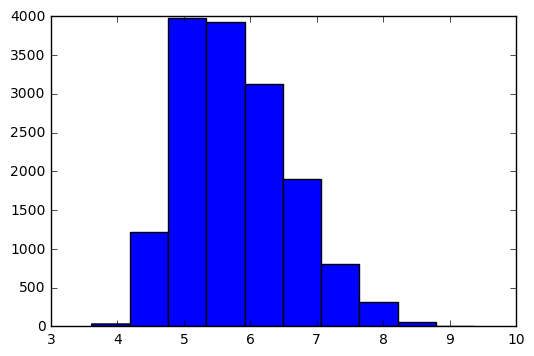

In [66]:
import matplotlib.pyplot as plt
lens = []
for i in df.values:
    lens.append(np.log(len(i[0])))
plt.hist(lens)
plt.show()

In [67]:
categories = df['Class'].unique()

In [68]:
categories

array(['grocery', 'Apps for Android', 'patio&lawn&garden', 'Electronics',
       'digitalmusic', 'HomeAndKitchen', 'SportsAndOutdoors',
       'Cellphone Accessories', 'Pet Supplies', 'videogames',
       'CD & Vinyl ', 'Movies & TV', 'Clothing & Jewellery',
       'Amazon Instant Video', 'music instruments',
       'Tools & Home Improvement', 'ToysAndGames', 'baby', 'Beauty',
       'Health', 'Automobile', 'Office Products'], dtype=object)

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['Review'])
X_train_counts

<15400x44342 sparse matrix of type '<class 'numpy.int64'>'
	with 882654 stored elements in Compressed Sparse Row format>

In [76]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape


tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(15400, 44342)

In [77]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, df['Class'])

In [119]:
docs_new = ["Quality of cards, money, houses,hotels are best. Houses and Hotels are made of wood. The dices are also of wood with numbers on them which are better than dices with dots. Good bank central bracket to keep money and cards which has separate sections for for everything. Tokens are heavy and good quality and made of brass which are better than plastic tokens. Overall a steal away at this price and this game is fun to play with friends and family. Flipkart delivered this product in 3 days."]

#docs_new = ["Henry Winkler stars in this remake of the classic tale of Scrooge.  This one is set in post-Depression era America and is oneof the best I've ever seen.  Winkler is equally at ease as a young man with a girlfriend or an old man with an attitude.  I watch this every Christmas and was delighted to discover it on DVD.  You'll love it!"]
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predictedMNB = clf.predict(X_new_tfidf)
predicted
for doc, category in zip(docs_new, predictedMNB):
    print('%r => %s' % (doc, category))

'Quality of cards, money, houses,hotels are best. Houses and Hotels are made of wood. The dices are also of wood with numbers on them which are better than dices with dots. Good bank central bracket to keep money and cards which has separate sections for for everything. Tokens are heavy and good quality and made of brass which are better than plastic tokens. Overall a steal away at this price and this game is fun to play with friends and family. Flipkart delivered this product in 3 days.' => ToysAndGames


In [79]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

In [81]:
text_clf = text_clf.fit(df['Review'], df['Class'])
#docs_test = dfo.values
predicted = text_clf.predict(dfo['Review'])
np.mean(predicted == dfo['Class'])         


0.88651515151515148

In [82]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, n_iter=5, random_state=42)),
])
text_clf = text_clf.fit(df['Review'], df['Class'])
predicted = text_clf.predict(dfo['Review'])
np.mean(predicted == dfo['Class']) 

0.86030303030303035

In [114]:
from sklearn import metrics
print(metrics.classification_report(dfo['Class'], predicted,
    target_names=categories))

                          precision    recall  f1-score   support

                 grocery       0.88      0.93      0.90       328
        Apps for Android       0.89      0.82      0.85       260
       patio&lawn&garden       0.83      0.75      0.79       296
             Electronics       0.81      0.92      0.86       322
            digitalmusic       0.92      0.82      0.87       295
          HomeAndKitchen       0.77      0.89      0.82       306
       SportsAndOutdoors       0.85      0.84      0.85       308
   Cellphone Accessories       0.88      0.69      0.77       294
            Pet Supplies       0.82      0.81      0.81       297
              videogames       0.88      0.82      0.85       320
             CD & Vinyl        0.84      0.87      0.85       291
             Movies & TV       0.86      0.90      0.88       291
    Clothing & Jewellery       0.84      0.95      0.89       298
    Amazon Instant Video       0.83      0.64      0.72       309
       mu

In [116]:
metrics.confusion_matrix(dfo['Class'], predicted)

array([[304,   1,   0,   0,   4,   1,   1,   0,   0,   0,  10,   2,   0,
          3,   0,   1,   0,   0,   0,   0,   0,   1],
       [  1, 212,   2,   0,   0,   7,   0,   3,   0,   0,   2,   0,   0,
          0,   0,   4,   2,   3,   0,   0,   1,  23],
       [  2,   4, 221,   3,   0,   3,   5,   2,   2,  15,   0,   3,   2,
          8,  11,   0,   0,   0,   3,   4,   8,   0],
       [  0,   0,   1, 295,   0,   0,   0,   0,   6,   0,   0,   2,   2,
          8,   0,   1,   3,   0,   3,   0,   1,   0],
       [  6,   0,   0,   0, 242,   0,   0,   0,   0,   0,  23,   1,   1,
          0,   0,   0,   4,  12,   0,   3,   0,   3],
       [  0,   1,   3,   2,   0, 271,   1,   3,   5,   1,   0,   5,   0,
          4,   0,   1,   3,   3,   0,   3,   0,   0],
       [  3,   1,   5,   4,   0,   8, 260,   1,   0,   0,   2,   3,   3,
          2,   1,   5,   8,   0,   1,   1,   0,   0],
       [  1,  12,   3,   0,   5,  34,   2, 203,  10,   0,   2,   7,   0,
          0,   1,   1,   2,   4,   1, 